**Diabetes Prdiction System**

Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

Data Collection and Analysis

In [3]:
diabetes_dataset = pd.read_csv('/content/diabetes.csv')

1.   Pregnancies: Number of times pregnant
2.   Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3.   BloodPressure: Diastolic blood pressure (mm Hg)
4.   SkinThickness: Triceps skin fold thickness (mm)
5.   Insulin: 2-Hour serum insulin (mu U/ml)
6.   BMI: Body mass index (weight in kg/(height in m)^2)
7.   DiabetesPedigreeFunction: Diabetes pedigree function
8.   Age: Age (years)
9.   Outcome: Class variable (0 or 1)

In [4]:
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
diabetes_dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
diabetes_dataset.shape

(768, 9)

In [7]:
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
diabetes_dataset['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


Text(0.5, 1.0, 'Overall Report')

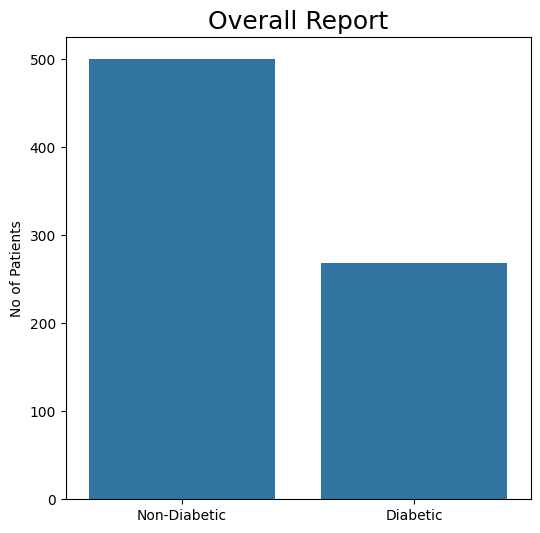

In [9]:
a= diabetes_dataset.Outcome.value_counts()
plt.figure(figsize=(6,6))
sns.barplot(x=['Non-Diabetic','Diabetic'],y=a)
plt.ylabel('No of Patients')
plt.title('Overall Report',fontsize = 18)

Text(0.5, 1.0, 'Patient Age')

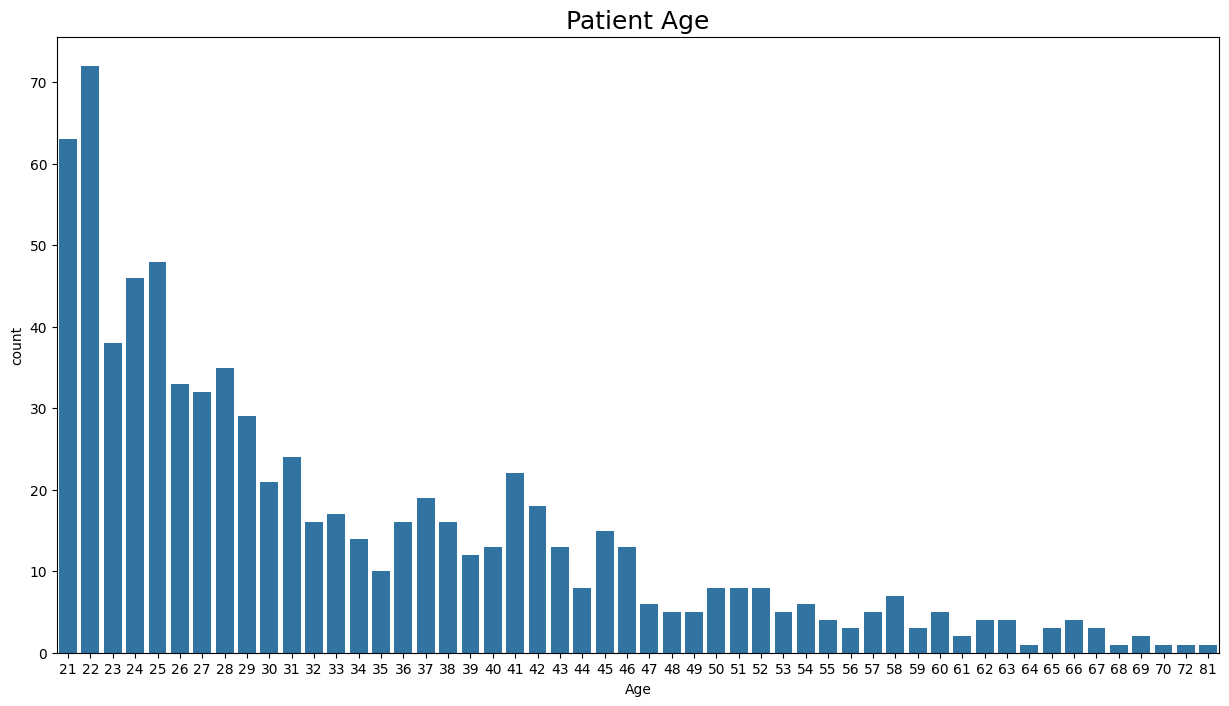

In [10]:
age=pd.DataFrame(diabetes_dataset.Age.value_counts())
plt.figure(figsize=(15,8))
sns.barplot(x=age.index,y='count',data=age)
plt.ylabel('count')
plt.title('Patient Age',fontsize=18)

In [11]:
px.histogram(diabetes_dataset, x="Age", color="Outcome")

In [12]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


Dividing the dataset columns into: X and Y
*   X is for testing
*   Y is for checking

In [13]:
X = diabetes_dataset.drop(columns='Outcome',axis=1)
Y = diabetes_dataset['Outcome']

In [14]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [15]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Data Standardization
*   Standardizing the data for saving time and making the calculation easier
*   Z= (x−μ)/σ

    x = original value

    μ = mean of the feature

    σ = standard deviation of the feature

    Z = standardized value

In [16]:
scaler = StandardScaler()

In [17]:
scaler.fit(X)

StandardScaler()

In [18]:
standardized_data = scaler.transform(X)

In [19]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [20]:
X = standardized_data
Y = diabetes_dataset['Outcome']

In [21]:
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Spliting Datasets for training and testing

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [23]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


Training the model

Model used: SVM(Support Vector Machine)

SVM is a supervised machine learning algorithm used for classification and regression, but it’s most commonly used for binary classification

Here in this case binary is diabetic(1) or non-diabetic(0)

In [24]:
classifier = svm.SVC(kernel='linear')

In [25]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [26]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [27]:
print('Accuracy score of the training data: ' ,round(training_data_accuracy*100,2))

Accuracy score of the training data:  78.66


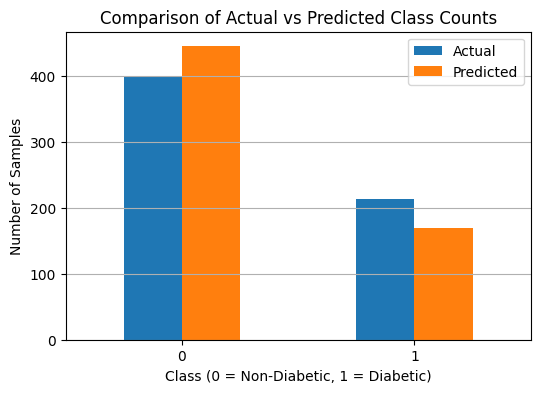

In [28]:
actual_counts = pd.Series(Y_train).value_counts().sort_index()
predicted_counts = pd.Series(X_train_prediction).value_counts().sort_index()

df_compare = pd.DataFrame({
    'Actual': actual_counts,
    'Predicted': predicted_counts
})

df_compare.plot(kind='bar', figsize=(6, 4))
plt.title('Comparison of Actual vs Predicted Class Counts')
plt.xlabel('Class (0 = Non-Diabetic, 1 = Diabetic)')
plt.ylabel('Number of Samples')
plt.xticks(rotation=0)
plt.grid(axis='y')

In [29]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [30]:
print('Accuracy score of the test data: ' , round(test_data_accuracy*100,2))

Accuracy score of the test data:  77.27


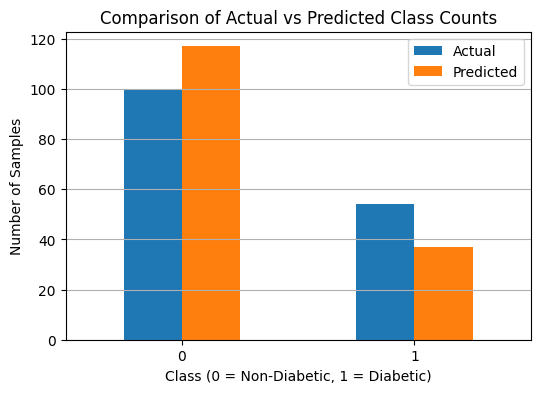

In [31]:
actual_counts = pd.Series(Y_test).value_counts().sort_index()
predicted_counts = pd.Series(X_test_prediction).value_counts().sort_index()

df_compare = pd.DataFrame({
    'Actual': actual_counts,
    'Predicted': predicted_counts
})

df_compare.plot(kind='bar', figsize=(6, 4))
plt.title('Comparison of Actual vs Predicted Class Counts')
plt.xlabel('Class (0 = Non-Diabetic, 1 = Diabetic)')
plt.ylabel('Number of Samples')
plt.xticks(rotation=0)
plt.grid(axis='y')

Classification Report and Confusion Matrix of Prediction

|           | Predicted: 0 | Predicted: 1 |
| --------- | ------------ | ------------ |
| Actual: 0 | (TN)         |  (FP)        |
| Actual: 1 | (FN)         |  (TP)        |



Confusion Matrix:


Text(0.5, 1.0, 'Confusion Matrix Heatmap')

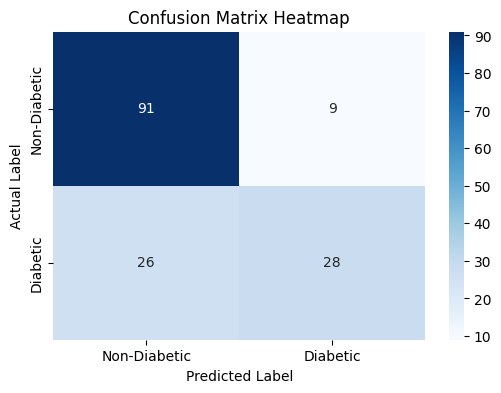

In [32]:
print("Confusion Matrix:")
cm= confusion_matrix(Y_test, X_test_prediction)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Diabetic', 'Diabetic'],
            yticklabels=['Non-Diabetic', 'Diabetic'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix Heatmap')

| **Metric**           | **Formula / Concept**                                                             | **What it Tells You**                                                  |
| -------------------- | --------------------------------------------------------------------------------- | ---------------------------------------------------------------------- |
| **Precision**        | $\frac{TP}{TP + FP}$                                                              | Out of all predicted positives, how many were correct                  |
| **Recall**           | $\frac{TP}{TP + FN}$                                                              | Out of all actual positives, how many were caught                      |
| **F1-score**         | $2 \times \frac{P \cdot R}{P + R}$                                                | Balance between precision and recall                                   |
| **Support**          | Count of actual samples in each class (e.g., 100 non-diabetics, 54 diabetics)     | Shows how many true examples were available for each class             |
| **Accuracy**         | $\frac{TP + TN}{\text{Total Samples}}$                                            | Overall how many predictions were correct                              |
| **Macro Average**    | Average of precision/recall/F1 across all classes **without considering support** | Treats all classes equally (useful for imbalanced datasets)            |
| **Weighted Average** | Average of precision/recall/F1 **weighted by support (class size)**               | More realistic view of overall performance when classes are imbalanced |


In [33]:
print("\nClassification Report:")
print(classification_report(Y_test, X_test_prediction))


Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       100
           1       0.76      0.52      0.62        54

    accuracy                           0.77       154
   macro avg       0.77      0.71      0.73       154
weighted avg       0.77      0.77      0.76       154



Making a Predictive System

In [35]:
# input_data = (4,110,92,0,0,37.6,0.191,30)
input_data = (5,166,72,19,175,25.8,0.587,51)
input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0]==0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.3429808   1.41167241  0.14964075 -0.09637905  0.82661621 -0.78595734
   0.34768723  1.51108316]]
[1]
The person is diabetic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

